# Analytics and Systems of Big Data Assignment


## Descriptive Analytics
### Raw Data
* The data set was imported in csv form.
* It's basic features such as dimension were analysed. 
* The description of each column, containing total count, number of unique values, most frequent etc. was obtained. 
* This information gives insight into the basic data structure and can also be used in later stages of cleaning and pre-processing. 


### Importing all necessary libraries

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [7]:

data= pd.read_csv ('Datasets/state.csv') #Load dataset

print(data.shape)
print(data.columns)
print(data.info())

print(data.head(5)) #peek at first five rows
for item in data.columns:
    print((data[item].describe()))

(15186, 5)
Index(['Symbol', 'Synonym Symbol', 'Scientific Name with Author',
       'National Common Name', 'Family'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15186 entries, 0 to 15185
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Symbol                       15186 non-null  object
 1   Synonym Symbol               9448 non-null   object
 2   Scientific Name with Author  15186 non-null  object
 3   National Common Name         5731 non-null   object
 4   Family                       15186 non-null  object
dtypes: object(5)
memory usage: 593.3+ KB
None
   Symbol Synonym Symbol           Scientific Name with Author  \
0  ANDRO5            NaN            Andrographis Wall. ex Nees   
1    ANEC            NaN      Andrographis echioides (L.) Nees   
2    ANEC          JUEC2                 Justicia echioides L.   
3   DIBR2            NaN  Dicliptera brac

### Pre-Proccessing - Renaming columns and NaN values
* Rename columns to remove spaces to make it easier for handling. 
* Check for existence of null(NaN) values.
    * Only two columns have NaN values. 
    * Percentage is caclulated. 
* NaN values replaced with appropriate values such as mode of values of column.

In [8]:
data.rename(columns = {'Synonym Symbol':'Syn_Symbol','Scientific Name with Author':'Sci_Name','National Common Name':'Common_Name'}, inplace = True)
# data.Family.nunique()
print(data.columns)
nan_freq=(data.isnull().mean())*100
print(nan_freq)

Index(['Symbol', 'Syn_Symbol', 'Sci_Name', 'Common_Name', 'Family'], dtype='object')
Symbol          0.000000
Syn_Symbol     37.784802
Sci_Name        0.000000
Common_Name    62.261293
Family          0.000000
dtype: float64


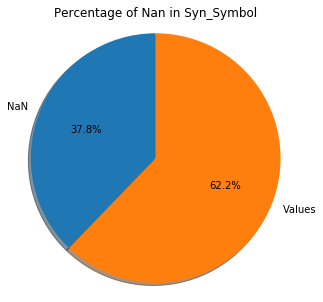

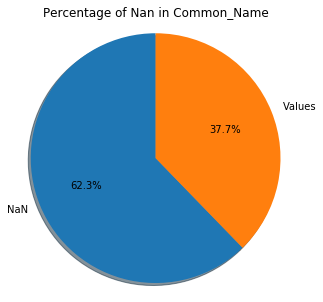

In [9]:

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'NaN', 'Values'
# Sym_Nan=data.Syn_Symbol.isnull().mean()*100
# print(nan_freq['Syn_Symbol'])
sizes=[nan_freq['Syn_Symbol'],100-nan_freq['Syn_Symbol']]
# explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

plt.rcParams['figure.figsize'] = [5 ,5]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of Nan in Syn_Symbol')

fig1, ax2 = plt.subplots()
sizes=[nan_freq['Common_Name'],100-nan_freq['Common_Name']]
ax2.pie(sizes, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of Nan in Common_Name')

plt.show()

### Imputing Data -  Replacing NaN values
 * The percentage of missing values is high in the Common_Name column, and hence the column is dropped from the dataframe for all further analysis and plotting.
 * The ffill (forward fill) and bfill (back fill) methods are used to replace the missing values  in the Syn_Symbol column. 



In [10]:
data.drop(["Common_Name"], axis = 1, inplace = True) 
data["Syn_Symbol"].fillna( method ='ffill', inplace = True) 
NaN_freq=(data.isnull().mean()*100)
print(NaN_freq) 
data["Syn_Symbol"].fillna( method ='bfill', inplace = True) 
NaN_freq=(data.isnull().mean()*100)
print(NaN_freq) 


Symbol        0.00000
Syn_Symbol    0.01317
Sci_Name      0.00000
Family        0.00000
dtype: float64
Symbol        0.0
Syn_Symbol    0.0
Sci_Name      0.0
Family        0.0
dtype: float64


### Pre-Processing - Splitting columns
* The column containing the 'Sci_Name' has multiple values in each cell. 
    * Each name has a minimum of two parts. Some names have an author as well, while some cells do not. 
    * Therefore, Sci_Name had been split into two columns, one denoting the  first part of the Scientific Name and the other the second. 
* The column 'Symbol' is split into it's constituent letters. 
* This makes it easier to analyze patterns and mine interesting rules in the later stages.  

In [11]:
Sci_Name_1=[]
Sci_Name_2=[]
for _,row in data.iterrows():
    names=row['Sci_Name'].split(' ')  
    Sci_Name_1.append(names[0])
    Sci_Name_2.append(names[1])

data["Sci_Name_1"]=Sci_Name_1
data["Sci_Name_2"]=Sci_Name_2
data.drop(["Sci_Name"], axis = 1, inplace = True) 

print(data.columns)
print(data.head(5))

data.to_csv('Datasets/Modified_Plants.csv', index=False)

Index(['Symbol', 'Syn_Symbol', 'Family', 'Sci_Name_1', 'Sci_Name_2'], dtype='object')
   Symbol Syn_Symbol       Family    Sci_Name_1  Sci_Name_2
0  ANDRO5      JUEC2  Acanthaceae  Andrographis       Wall.
1    ANEC      JUEC2  Acanthaceae  Andrographis   echioides
2    ANEC      JUEC2  Acanthaceae      Justicia   echioides
3   DIBR2      JUEC2  Acanthaceae    Dicliptera   brachiata
4   DIBR2      DIBR6  Acanthaceae     Diapedium  brachiatum


### Visualization - Plotting the distribution
* Dataframe consist of categorical values. 
* The distribution of values in each column is plotted as a histpgram/bar graph based on frequency of occurence. 
* The number of unique values in each column is identified.
* If percentage of unique values is high, the dataset is pruned so as to include only the top most frequent items. 

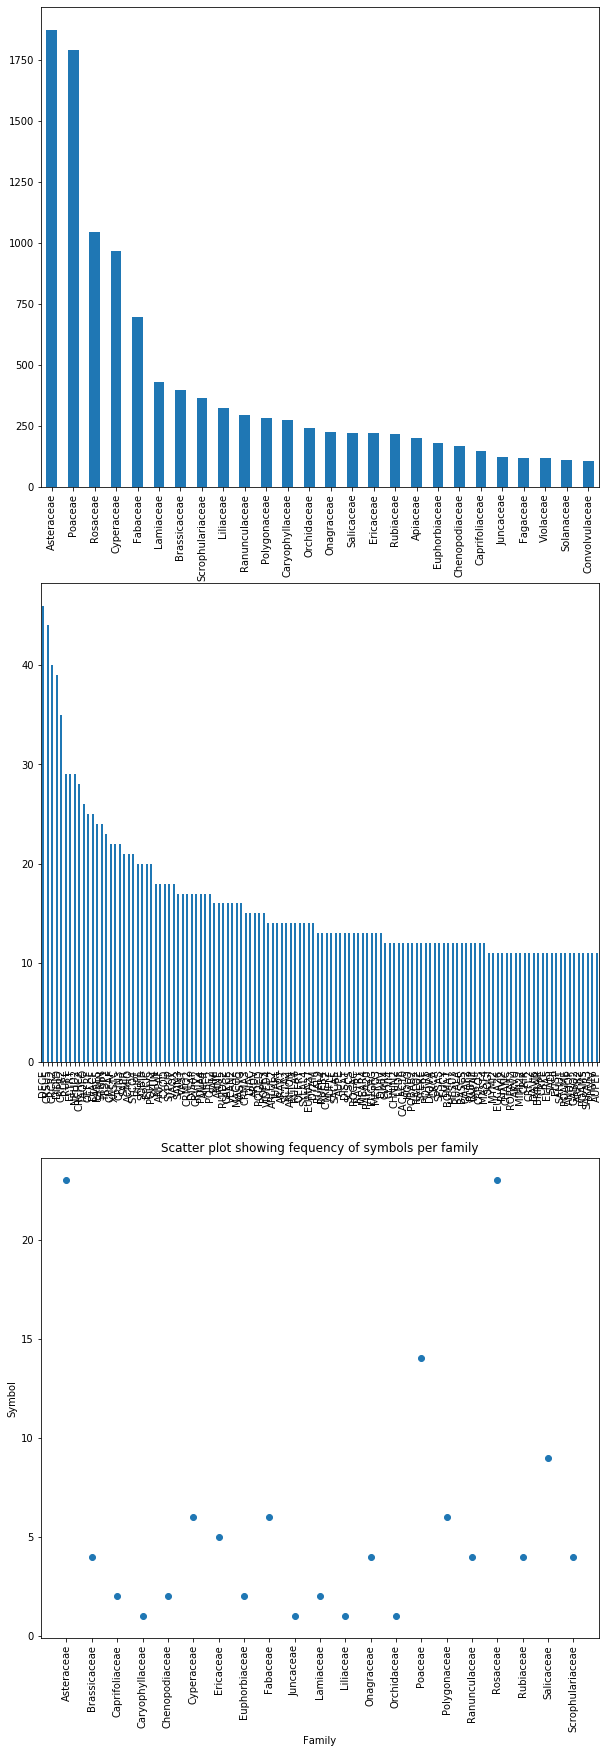

In [44]:
data = data[data.groupby('Family')['Family'].transform('size') > 100]
data = data[data.groupby('Symbol')['Symbol'].transform('size') > 10]
data.reset_index(drop=True,inplace=True)


plt.rcParams['figure.figsize'] = [10, 30]
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4)

data['Family'].value_counts().plot(ax=ax1, kind='bar')
plt.title('Frequency of Families')

data['Symbol'].value_counts().plot(ax=ax2, kind='bar')
plt.title('Frequency of Symbols')

# symbol_plot=data['Symbol'].value_counts().gt(10)
# sns.barplot(symbol_pManasa avaloda program la file name lot.index,symbol_plot.values , alpha = 0.5)
# plt.xticks(rotation = 90)


group_Symbol=data.groupby('Family')['Symbol'].nunique()
# plt.figure(figsize=(10,10))
plt.scatter(group_Symbol.index, group_Symbol.values)
plt.xticks(rotation = 90)
plt.xlabel('Family')
plt.ylabel('Symbol')
plt.title('Scatter plot showing fequency of symbols per family')



group_Name=data.groupby('Family')['Sci_Name_1'].nunique()
# plt.figure(figsize=(10,10))
plt.scatter(group_Name.index, group_Name.values)
plt.xticks(rotation = 90)
plt.xlabel('Family')
plt.ylabel('Sci_Name_1')
plt.title('Scatter plot showing fequency of first half of scientifc name per family')

plt.show()
